## 2. Continue Data Exploration on the Combined Data Set and Process

Combine data code learned and followed from:

Fu, C. & Kazmi, H. (2022, November 10). [Buildsys22 tutorial] 1 EDA and Modeling. Kaggle. URL: https://www.kaggle.com/code/patrick0302/buildsys22-tutorial-1-eda-and-modeling

In [2]:
#import libraries
import boto3
import sagemaker
import pandas as pd
import os
import tqdm
import numpy as np

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [3]:
s3_private_path_csv = "s3://{}/Smart_Grid/data/processeddata/".format(bucket)
print(s3_private_path_csv)

s3://sagemaker-us-east-1-911199926915/Smart_Grid/data/processeddata/


### EDA:

In [4]:
df = pd.read_csv('s3://sagemaker-us-east-1-911199926915/Smart_Grid/data/processeddata/dataT.csv',index_col='tstp',parse_dates=True)

In [5]:
df

,MAC000002,MAC000003,MAC000004,MAC000005,MAC000006,MAC000007,MAC000008,MAC000009,MAC000010,MAC000011,...,MAC005554,MAC005555,MAC005557,MAC005558,MAC005561,MAC005562,MAC005564,MAC005565,MAC005566,MAC005567
tstp,,,,,,,,,,,,,,,,,,,,,
2011-11-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-23 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-23 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-23 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-27 22:00:00,0.416,0.042,0.167,0.248,0.067,0.282,NaN,0.193,0.534,0.171,...,NaN,0.119,0.143,0.0,0.361,0.427,0.121,NaN,0.141,0.173
2014-02-27 22:30:00,1.350,0.117,0.000,0.113,0.047,0.346,NaN,0.338,0.478,0.145,...,NaN,0.062,0.125,0.0,0.088,0.336,0.135,NaN,0.123,0.205
2014-02-27 23:00:00,1.247,0.064,0.000,0.111,0.014,0.168,NaN,0.207,0.584,0.118,...,NaN,0.113,0.171,0.0,0.087,0.167,0.077,NaN,0.155,0.221


In [6]:
datapath = "s3://sagemaker-us-east-1-911199926915/Smart_Grid/data/archive-2/"

In [7]:
#load weather infomation
weather_hourly_darksky = pd.read_csv(os.path.join(datapath,'weather_hourly_darksky.csv'),index_col='time',parse_dates=True)
weather_hourly_darksky

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2011-11-11 00:00:00,5.97,104,10.24,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
2011-11-11 01:00:00,4.88,99,9.76,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2011-11-11 02:00:00,3.70,98,9.46,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
2011-11-11 03:00:00,3.12,99,9.23,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
2011-11-11 04:00:00,1.85,111,9.26,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...
2014-02-15 19:00:00,12.68,247,7.39,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
2014-02-15 20:00:00,13.78,249,6.56,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
2014-02-15 21:00:00,14.31,248,6.47,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear


<AxesSubplot:xlabel='time'>

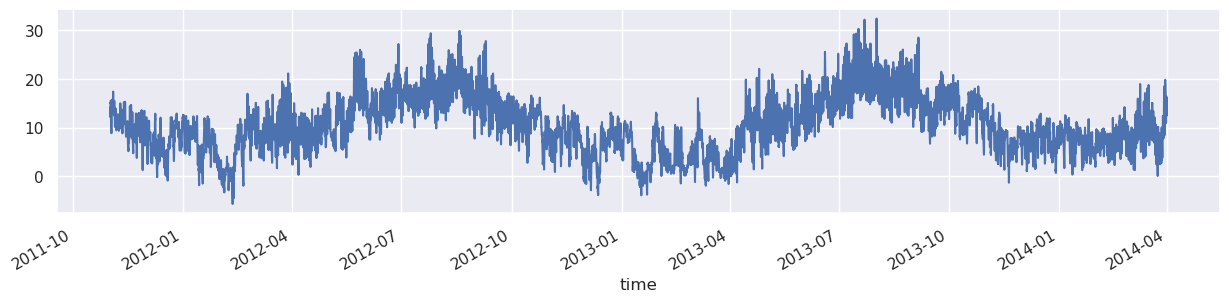

In [8]:
#import more libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time
#only take temperature data from weather data
temperaturedata = weather_hourly_darksky['temperature']
#plot 
temperaturedata.plot(figsize=(15,3))

In [9]:
#import preprocssing package
from sklearn import preprocessing
#load uk_bank_holidays.csv
dfholiday = pd.read_csv(os.path.join(datapath,'uk_bank_holidays.csv'))
#set the time
dfholiday['Bank holidays'] = pd.to_datetime(dfholiday['Bank holidays'])
#change columns name
dfholiday = dfholiday.rename(columns={'Bank holidays':'date','Type':'Holiday'})
dfholiday

,date,Holiday
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day)
9,2013-12-26,Boxing Day


In [10]:
#using LabelEncoder() to change to digit 
calendarencoder = preprocessing.LabelEncoder()
dfholiday['Holiday'] = calendarencoder.fit_transform(dfholiday['Holiday'])
dfholiday

,date,Holiday
0,2012-12-26,0
1,2012-12-25,1
2,2012-08-27,10
3,2012-05-06,7
4,2012-04-06,9
5,2012-07-05,2
6,2012-09-04,3
7,2012-06-04,4
8,2012-02-01,6
9,2013-12-26,0


In [11]:
#Take average of all meters to hourly interval
houseAVG = df.mean(axis=1).to_frame()
houseAVG.columns = ['kWh']

In [12]:
houseAVG

,kWh
tstp,
2011-11-23 09:00:00,0.284500
2011-11-23 09:30:00,0.280500
2011-11-23 10:00:00,0.153333
2011-11-23 10:30:00,0.098000
2011-11-23 11:00:00,0.110286
...,...
2014-02-27 22:00:00,0.299760
2014-02-27 22:30:00,0.285163
2014-02-27 23:00:00,0.252274


Text(0.5, 1.0, 'Missing data in time series')

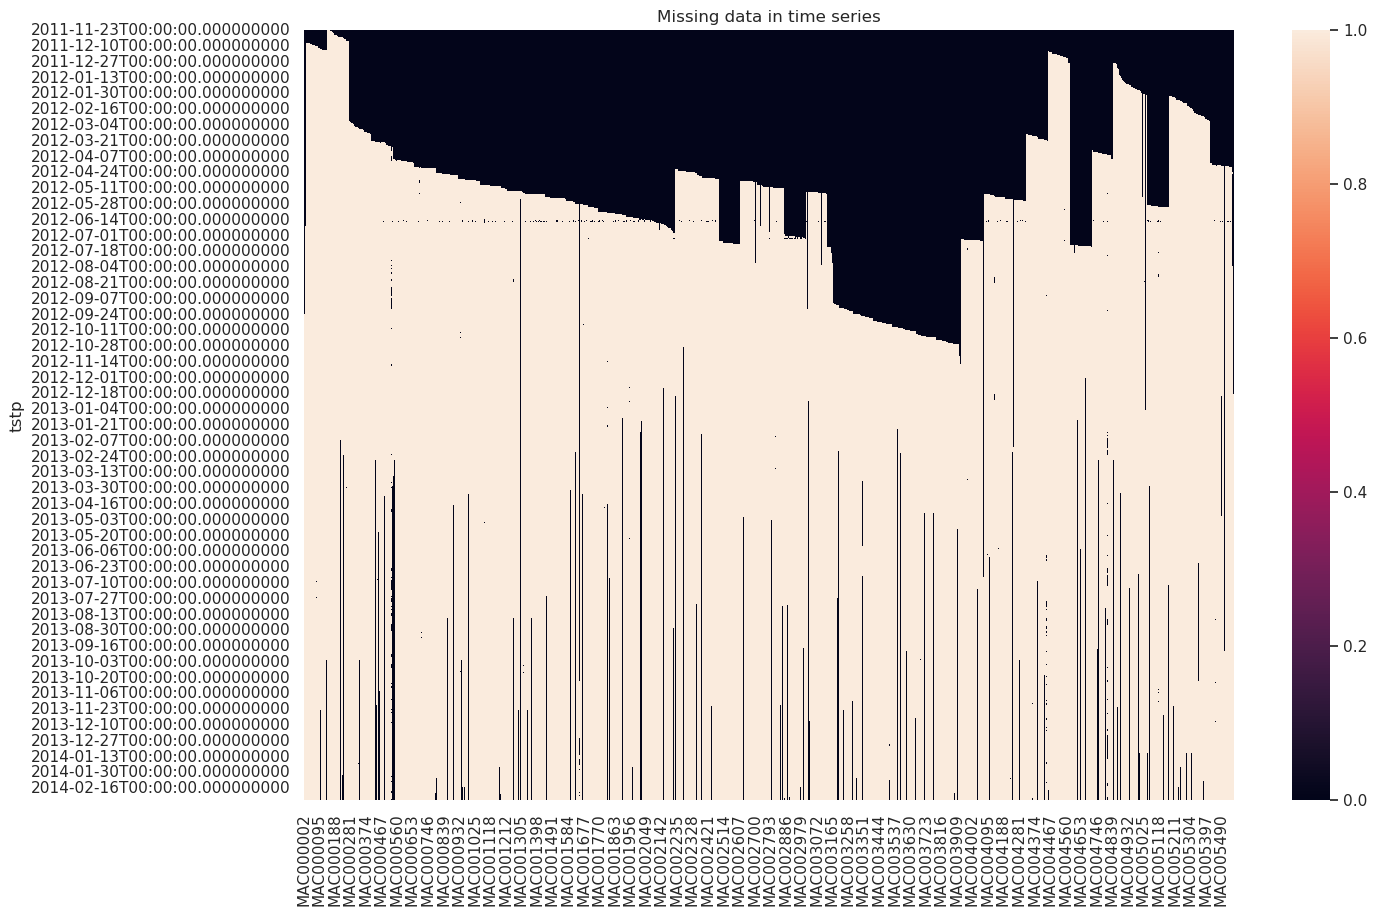

In [13]:
#plot a heat map to see the section of time missing consumption data
plt.figure(figsize=(15,10))
ax = sns.heatmap(~df.resample('D').mean().isna())
ax.set_title('Missing data in time series')

There are a lot meter missing consumption data from 2011 November to 2012 November. Then we will only focus on the meter that is from 2013 January to the end (2014 February).

### Feature Engineering:

In [17]:
#Use previouse processed average data
meterdataset = houseAVG.copy()
#Add new time columns date, weekday, hour
meterdataset['timestamp'] = meterdataset.index
meterdataset['date'] = pd.to_datetime(df.index.date)
meterdataset['weekday'] = meterdataset.index.weekday
meterdataset['hour'] = meterdataset.index.hour + meterdataset.index.minute/60
#add temperature information
meterdataset = meterdataset.merge(temperaturedata, left_index=True, right_index=True)
#add holiday information
meterdataset = meterdataset.merge(dfholiday, on='date', how='left')
#drop date column
meterdataset = meterdataset.drop('date',axis=1)
#add Holiday column name
meterdataset['Holiday'] = meterdataset['Holiday'].fillna(-1)
meterdataset['year'] = pd.DatetimeIndex(meterdataset['timestamp']).year
meterdataset['month'] = pd.DatetimeIndex(meterdataset['timestamp']).month
#set index
meterdataset.set_index('timestamp',inplace=True)
#delete NA
meterdataset = meterdataset.dropna()
meterdataset

,kWh,weekday,hour,temperature,Holiday,year,month
timestamp,,,,,,,
2011-11-23 09:00:00,0.284500,2,9.0,4.84,-1.0,2011,11
2011-11-23 10:00:00,0.153333,2,10.0,5.74,-1.0,2011,11
2011-11-23 11:00:00,0.110286,2,11.0,7.67,-1.0,2011,11
2011-11-23 12:00:00,0.394222,2,12.0,8.84,-1.0,2011,11
2011-11-23 13:00:00,0.258333,2,13.0,9.87,-1.0,2011,11
...,...,...,...,...,...,...,...
2014-02-27 20:00:00,0.347004,3,20.0,5.94,-1.0,2014,2
2014-02-27 21:00:00,0.334706,3,21.0,5.03,-1.0,2014,2
2014-02-27 22:00:00,0.299760,3,22.0,4.10,-1.0,2014,2


In [ ]:
from io import StringIO
csv_buffer = StringIO()
meterdataset.to_csv(csv_buffer)

object_key = 'Smart_Grid/data/processeddata/pdata.csv'

s3.put_object(Bucket=bucket, Key=object_key, Body=csv_buffer.getvalue())

In [6]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>